In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [49]:
#import dataset
df = pd.read_csv('processed.cleveland.data', header=None)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [51]:
#cp -Chest Pain, restbp - resting blood pressure, chol - serum cholesterol
#fbs - fasting blood sugar, restecg - resting ecg results,
#thalach - max heart rate, exang - exercise angina, oldspeak - ST depression
#slope - the slope peak exercise, ca - number of major vessels(0-3) colored
#thal - thalium heart scan, hd - diagnosis

df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exam',
             'oldspeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exam,oldspeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [52]:
#Identifying Missing Data in our dataset
df.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exam        float64
oldspeak    float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [53]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [54]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [55]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [56]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exam,oldspeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [57]:
len(df)

303

In [58]:
df_nMissingValues = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [59]:
len(df_nMissingValues)

297

In [60]:
df_nMissingValues['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [61]:
df_nMissingValues['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [62]:
X = df_nMissingValues.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exam,oldspeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [63]:
y = df_nMissingValues['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [64]:
X.dtypes

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exam        float64
oldspeak    float64
slope       float64
ca           object
thal         object
dtype: object

In [65]:
X['cp'].unique()#chest pain

array([1., 4., 3., 2.])

In [66]:
#Categorical Data and One Hot encoding to preprocess the data in order to improve the svm performance
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exam,oldspeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [67]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exam,oldspeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [68]:
#Check the different levels of heart disease
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [69]:
#Instead of working with 5 levels of heart disease, in a first approach 
#its better to know if whether a person has heart disease or not
y_nZero_idx = y > 0
y[y_nZero_idx] = 1
y.unique()

array([0, 1], dtype=int64)

In [70]:
#Spliting data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

In [71]:
#Scaling our data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [72]:
#Building our SVM model

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

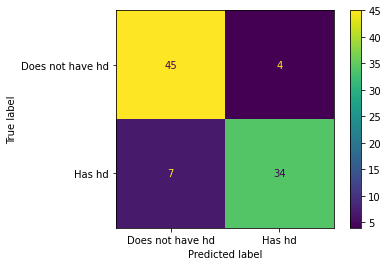

In [73]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=['Does not have hd', 'Has hd'])

In [74]:
#Cross Validation to improve the model accuracy
param_grid = [{'C' : [1, 10, 100, 1000],
              'gamma' : [0.001, 0.0001],
              'kernel' : ['rbf']},
             ]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    verbose = 0
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [75]:
clf_svm = SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

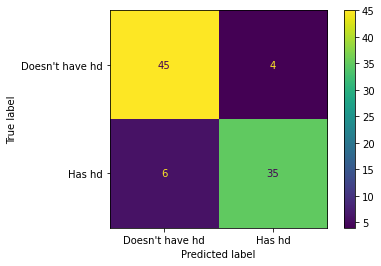

In [76]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=["Doesn't have hd", 'Has hd'])

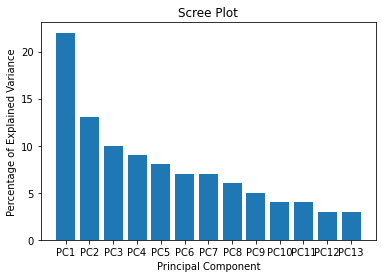

In [85]:
#PCA DIMENSION REDUCTION
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=0)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

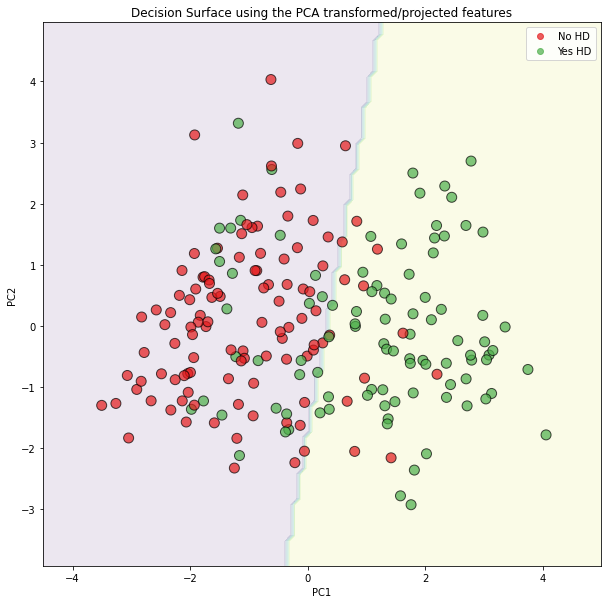

In [92]:
pc1 = X_train_pca[:,0]#data's x-axis coordinates after pca
pc2 = X_train_pca[:,1]#data's y-axis coordinates after pca

clf_svm = clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

#Matrix of points that shows the decision regions
#The matrix will represent the amostral space which is why it's larger than the
#pca range

x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=.1),
                     np.arange(start=y_min, stop=y_max, step=.1))

#Classifying every point in the previous matrix using SVM 
#obeying the given classification

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=.1)

cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])

#the actual data points plot
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

#Creating a Legend
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc="upper right")
legend.get_texts()[0].set_text('No HD')
legend.get_texts()[1].set_text('Yes HD')

#Labels and Titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface using the PCA transformed/projected features')
plt.show()